In [2]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

### Creación y Analisis de Datos

In [3]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
data=np.array(list(zip(x1,x2))).reshape(len(x1),2) #reshape(#filas,#columnas)
data.shape

(17, 2)

Text(0,0.5,'y')

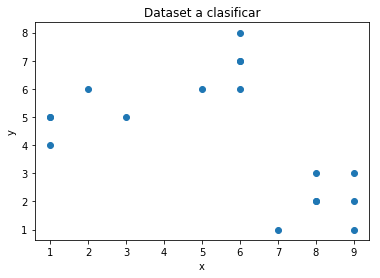

In [4]:
plt.scatter(x1,x2)
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")

### Obtencion del numero optimo de clusters

In [13]:
max_clust=len(data)
clusters=range(2,max_clust)#importante crear mas de 2 clusters para el metodo de silueta y codo
ssw=[] #suma de los cuadrados internos

for k in clusters:
    kmean_model=KMeans(n_clusters=k).fit(data)
    
    ssw_k=sum(np.min(cdist(data,kmean_model.cluster_centers_,'euclidean'),axis=1))
    ssw.append(ssw_k)
    
ssw2=np.diff(ssw) 
ssw2=[abs(num) for num in ssw2]

max=0

for index_i,i in enumerate(ssw2):
    if(i>max):
        max=i
        idx=index_i
    for index_j,j in enumerate(ssw2):
        if(j>max):
            max=j
            idx=index_j          
print('Numero optimo de clusters: '+str(clusters[idx+1]))

Numero optimo de clusters: 3


### Representacion del codo

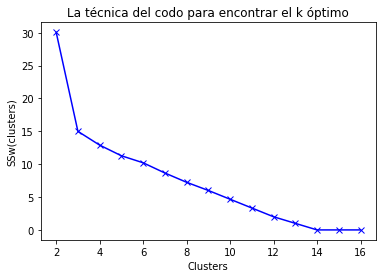

In [6]:
plt.plot(clusters, ssw, "bx-")
plt.xlabel("Clusters")
plt.ylabel("SSw(clusters)")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.show()

## Comprobacion con Scipy

In [7]:
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.cluster.hierarchy import fcluster

In [8]:
z=linkage(data,'ward')
z2=z[:,2] #se obtienen todas las distancias de los clusters calculados

def max_diff(dist_clusters):
    diff_clusters=np.diff(dist_clusters)
    max=0
    for index_i,i in enumerate(diff_clusters):
        if(i>max):
            max=i
            idx=index_i
        for index_j,j in enumerate(diff_clusters):
            if(j>max):
                max=j
                idx=index_j          
    return (dist_clusters[idx])

max_d=round(max_diff(z2),2)
max_d
clusters=fcluster(z,max_d,criterion='distance')
print('Numero de clusters optimos: '+ str(clusters.max()))

Numero de clusters optimos: 3
